#Object Detection menggunakan Yolov3 dengan training model. Hasil train model dan dataset*** https://drive.google.com/drive/folders/13Cwo_pmAm4Wju8TtmaixOns-rCpOOZki?usp=sharing ***

In [ ]:
# Check if NVIDIA GPU is enabled
!nvidia-smi


Sun Apr 10 13:17:35 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
ln: failed to create symbolic link '/mydrive/My Drive': File exists
 1101190019_6.xlsx
 1101204131_ACA-AWM.pdf
 1101204131_FER-ACA.docx
 1102201674_MAD-ACA.pdf
'12. Peluang.docx'
 1574036995218.jpg
 1599905223792.jpg
 1.mp4
'2 fix banget.mp4'
'37_Anisa Anggraeny_1101190019_TE (1).pdf'
'37_Anisa Anggraeny_1101190019_TE.pdf'
 3.mp4
 3x4.jpg
'4 Halaman.PNG'
 9b11838b-8985-4488-be5f-e35092b97551.jpg
'absen pembayaran kas kelas XI TKJ 3.gsheet'
'ADS ancaman worm-ddos.gdoc'
'Anisa Anggraeny_1101190019_TT-43-06.rar'
'Anisa Anggraeny_1101190019_Tugas 1.pdf'
'ANISA ANGGRAENY_1101190019_UTSPDA.pdf'
'Anisa Anggraeny_16Personalities.pdf'
'Anisa Anggraeny.jpeg'
'Anisa Anggraeny_XI TKJ 3_01.pdf'
 Asterisk
'BAB4. TEOREMA RANGKAIAN (Coret2 Final).gslides'
'BAP_TF_Anisa Anggraeny_1101190019 (1).jpg'
'BAP_TF_Anisa Anggraeny_1101190019.jpg'
'Big Data.pdf'
'BS_SEJARAH_KLS XI_S

In [ ]:
# Clone
!git clone https://github.com/AlexeyAB/darknet


Cloning into 'darknet'...
remote: Enumerating objects: 15412, done.
remote: Total 15412 (delta 0), reused 0 (delta 0), pack-reused 15412
Receiving objects: 100% (15412/15412), 14.02 MiB | 18.48 MiB/s, done.
Resolving deltas: 100% (10356/10356), done.


In [ ]:
# Configure
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
# Compile
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

# 2. Configure yolov3.cfg file

In [ ]:
# Make a copy of yolov3.cfg
!cp cfg/yolov3.cfg cfg/yolov3_training.cfg

In [ ]:
# Change lines in yolov3.cfg file
!sed -i 's/batch=1/batch=64/' cfg/yolov3_training.cfg
!sed -i 's/subdivisions=1/subdivisions=16/' cfg/yolov3_training.cfg
!sed -i 's/max_batches = 500200/max_batches = 4000/' cfg/yolov3_training.cfg
!sed -i '610 s@classes=80@classes=2@' cfg/yolov3_training.cfg
!sed -i '696 s@classes=80@classes=2@' cfg/yolov3_training.cfg
!sed -i '783 s@classes=80@classes=2@' cfg/yolov3_training.cfg
!sed -i '603 s@filters=255@filters=21@' cfg/yolov3_training.cfg
!sed -i '689 s@filters=255@filters=21@' cfg/yolov3_training.cfg
!sed -i '776 s@filters=255@filters=21@' cfg/yolov3_training.cfg

# 3. Create .names and .data files

In [ ]:
!echo -e 'apple\nbanana' > data/obj.names
!echo -e 'classes= 2 \ntrain  = data/train.txt \nvalid  = data/test.txt\n names = data/obj.names\n backup = /content/gdrive/MyDrive/yolov3' > data/obj.data


# 4) Save yolov3_training.cfg and obj.names files in Google drive

In [ ]:
!cp cfg/yolov3_training.cfg /content/gdrive/MyDrive/yolov3/yolov3_testing.cfg
!cp data/obj.names /content/gdrive/MyDrive/yolov3/classes.txt

# 5) Create a folder and unzip image dataset

In [ ]:
!mkdir data/obj
!unzip /content/gdrive/MyDrive/yolov3/images.zip -d data/obj

Archive:  /content/gdrive/MyDrive/yolov3/images.zip
   creating: data/obj/images/
  inflating: data/obj/images/apel-pisang1.jpg  
  inflating: data/obj/images/apel-pisang1.txt  
  inflating: data/obj/images/apel-pisang2.jpg  
  inflating: data/obj/images/apel-pisang2.txt  
  inflating: data/obj/images/apel-pisang3.jpg  
  inflating: data/obj/images/apel-pisang3.txt  
  inflating: data/obj/images/apel-pisang4.jpg  
  inflating: data/obj/images/apel-pisang4.txt  
  inflating: data/obj/images/apple_91.jpg  
  inflating: data/obj/images/apple_91.txt  
  inflating: data/obj/images/apple_92.jpg  
 extracting: data/obj/images/apple_92.txt  
  inflating: data/obj/images/apple_93.jpg  
  inflating: data/obj/images/apple_93.txt  
  inflating: data/obj/images/apple_94.jpg  
  inflating: data/obj/images/apple_94.txt  
  inflating: data/obj/images/apple_95.jpg  
  inflating: data/obj/images/apple_95.txt  
  inflating: data/obj/images/banana_77.jpg  
  inflating: data/obj/images/banana_77.txt  
  in

# 6) Create train.txt file

In [ ]:
import glob
images_list = glob.glob("/content/darknet/data/obj/images/*.jpg")
with open("data/train.txt", "w") as f:
    f.write("\n".join(images_list))

# 7) Download pre-trained weights for the convolutional layers file


In [ ]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2022-04-10 13:20:19--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  57.9MB/s    in 2.7s    

2022-04-10 13:20:22 (57.9 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



# 8) Start training

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_training.cfg darknet53.conv.74 -dont_show
# Uncomment below and comment above to re-start your training from last saved weights
#!./darknet detector train data/obj.data cfg/yolov3_training.cfg /mydrive/yolov3/yolov3_training_last.weights -dont_show

 try to allocate additional workspace_size = 12.46 MB 
 CUDA allocate done! 
Loaded: 0.000052 seconds
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.550949), count: 5, class_loss = 0.592461, iou_loss = 0.814830, total_loss = 1.407292 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000006, iou_loss = 0.000000, total_loss = 0.000006 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000001, iou_loss = 0.000000, total_loss = 0.000001 
 total_bbox = 89201, rewritten_bbox = 0.164796 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.702118), count: 7, class_loss = 0.559287, iou_loss = 0.571096, total_loss = 1.130383 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000039, iou_loss = 0.000000, total_loss = 0.000039 
v3 (mse

# Testing


In [ ]:
import cv2
import numpy as np

# Load Yolo
net = cv2.dnn.readNet("/content/gdrive/MyDrive/yolov3/yolov3_training_last.weights", "/content/gdrive/MyDrive/yolov3/yolov3_testing.cfg")
#net = cv2.dnn.readNetFromONNX("/content/drive/MyDrive/objectdetection/best.torchscript.pt")
classes = []
with open("/content/gdrive/MyDrive/yolov3/classes.txt", "r") as f:
    classes = f.read().splitlines()
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [ ]:
# Loading image
img = cv2.imread("/content/gdrive/MyDrive/yolov3/images.jpg")

img = cv2.resize(img, None,fx=0.4, fy=0.4)
height, width, channels = img.shape

# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

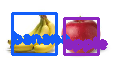

In [ ]:
# Showing informations on the screen
from google.colab.patches import cv2_imshow
#%matplotlib inline
#from matplotlib import pyplot as plt
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            # extract the upper left corners positions in order to present them with use of opencv
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
#print(indexes)
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[class_ids[i]]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 1, color, 3)

cv2_imshow(img)

cv2.waitKey(0)
cv2.destroyAllWindows()

#Testing with different pic

In [ ]:
# Loading image
img = cv2.imread("/content/gdrive/MyDrive/yolov3/apple_89.jpg")

img = cv2.resize(img, None,fx=0.4, fy=0.4)
height, width, channels = img.shape

# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

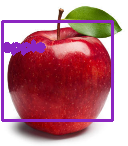

In [ ]:
# Showing informations on the screen
from google.colab.patches import cv2_imshow
#%matplotlib inline
#from matplotlib import pyplot as plt
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            # extract the upper left corners positions in order to present them with use of opencv
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
#print(indexes)
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[class_ids[i]]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 1, color, 3)

cv2_imshow(img)

cv2.waitKey(0)
cv2.destroyAllWindows()